# Data Loading & Library Import

In [6]:
''' BASIC LIBRARY '''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' MODEL & EVALUATION '''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('churn-dataset.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print("\nInformasi dataset: ")
data.info()


Informasi dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- RowNumber: Nomor baris dalam dataset yang digunakan untuk identifikasi unik setiap entri. Fitur ini tidak memiliki makna analitis.
- CustomerId: ID unik yang mengidentifikasi setiap pelanggan dalam sistem. Ini berguna untuk referensi dan penggabungan data.
- Surname: Nama belakang pelanggan. Fitur ini tidak digunakan dalam analisis model karena tidak relevan.
- CreditScore: Skor kredit yang menunjukkan kelayakan kredit pelanggan. Skor ini dapat memengaruhi keputusan mereka untuk tetap atau berhenti menggunakan layanan.
- Geography: Lokasi geografis tempat tinggal pelanggan. Informasi ini dapat memengaruhi perilaku dan kebutuhan layanan pelanggan.
- Gender: Jenis kelamin pelanggan. Meskipun tidak selalu memengaruhi churn secara langsung, informasi ini berguna untuk analisis demografis.
- Age: Usia pelanggan. Usia dapat memengaruhi kebiasaan dan preferensi dalam menggunakan layanan.
- Tenure: Lama berlangganan pelanggan. Durasi berlangganan ini sering kali berhubungan dengan kemungkinan pelanggan untuk churn.
- Balance: Saldo rekening pelanggan. Saldo ini dapat memengaruhi kepuasan pelanggan dan kecenderungan mereka untuk tetap menggunakan layanan.
- NumOfProducts: Jumlah produk yang dimiliki pelanggan. Fitur ini membantu memahami keterlibatan pelanggan dengan berbagai produk.
- HasCrCard: Ini menunjukkan pelanggan memiliki kartu kredit atau tidak. Fitur ini dapat memengaruhi pengalaman pelanggan dengan layanan.
- IsActiveMember: Status keanggotaan aktif pelanggan. Ini menunjukkan pelanggan masih aktif atau tidak dalam menggunakan layanan.
- EstimatedSalary: Gaji yang diperkirakan dari pelanggan. Gaji dapat memengaruhi keputusan pelanggan untuk berlangganan atau berhenti dari layanan.
- Exited: Label target yang menunjukkan pelanggan telah keluar dari layanan (1) atau tidak (0). Fitur ini merupakan variabel yang ingin diprediksi dalam model klasifikasi.

# Data Cleaning

In [7]:
print("\nCek Missing Values: ")
data.isnull().sum()


Cek Missing Values: 


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*Tidak ada Missing Values*. Sekarang kita akan drop fitur yang tidak digunakan

In [8]:
# Hapus kolom ttak berguna
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Tampilkan setelah drop
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
# CEK DUPLIKASI DATA

data.duplicated().sum()

0

*Tidak ada data duplikasi. Data ini bersih*

# Exploratory Data Analysis

In [11]:
# Distribusi for numerik

skewness_value = data.select_dtypes(include='number').skew()
print(skewness_value)

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64


- X > 0 -> skew positif
- X < 0 -> skew negatif
- 0 -> distribution normal

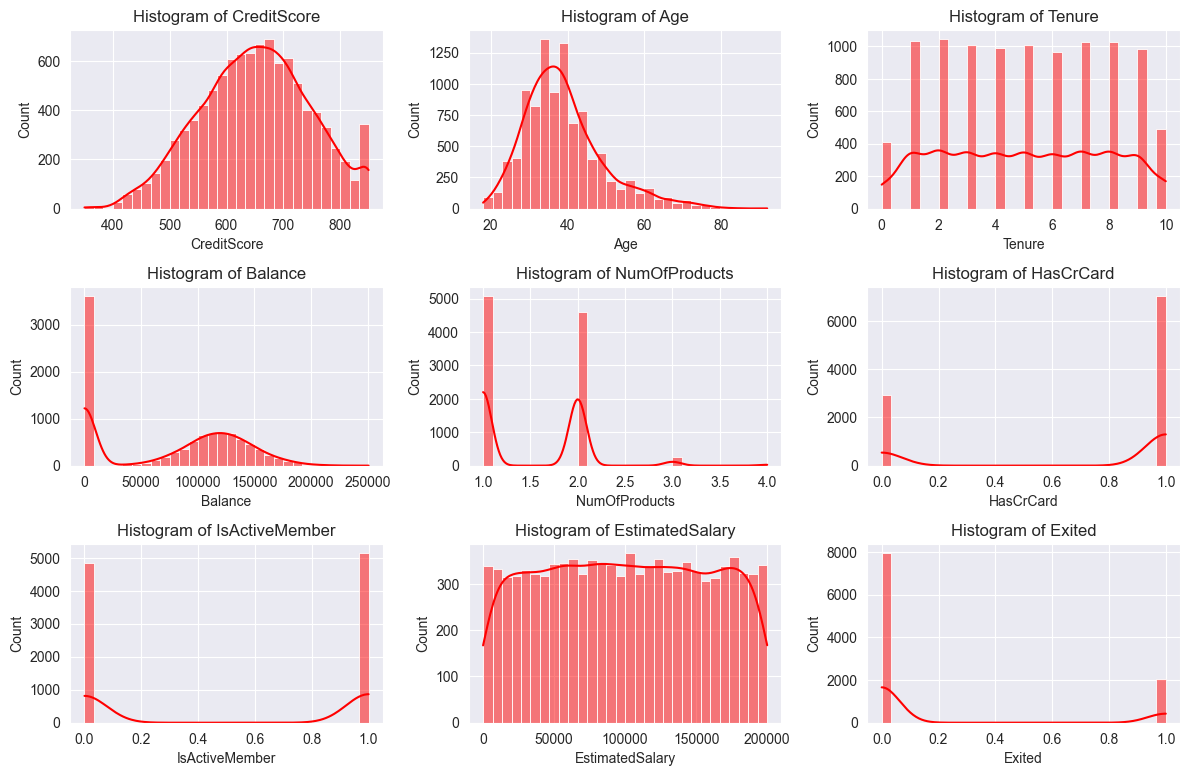

In [15]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include='number').columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color="red")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

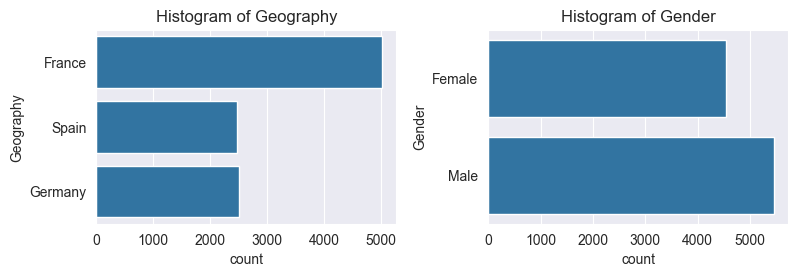

In [25]:
# CEK DISTRIBUSI DATA KATEGORIK
cat_features = data.select_dtypes(include='object').columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=data[col])
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

**KORELASI ANALISIS**

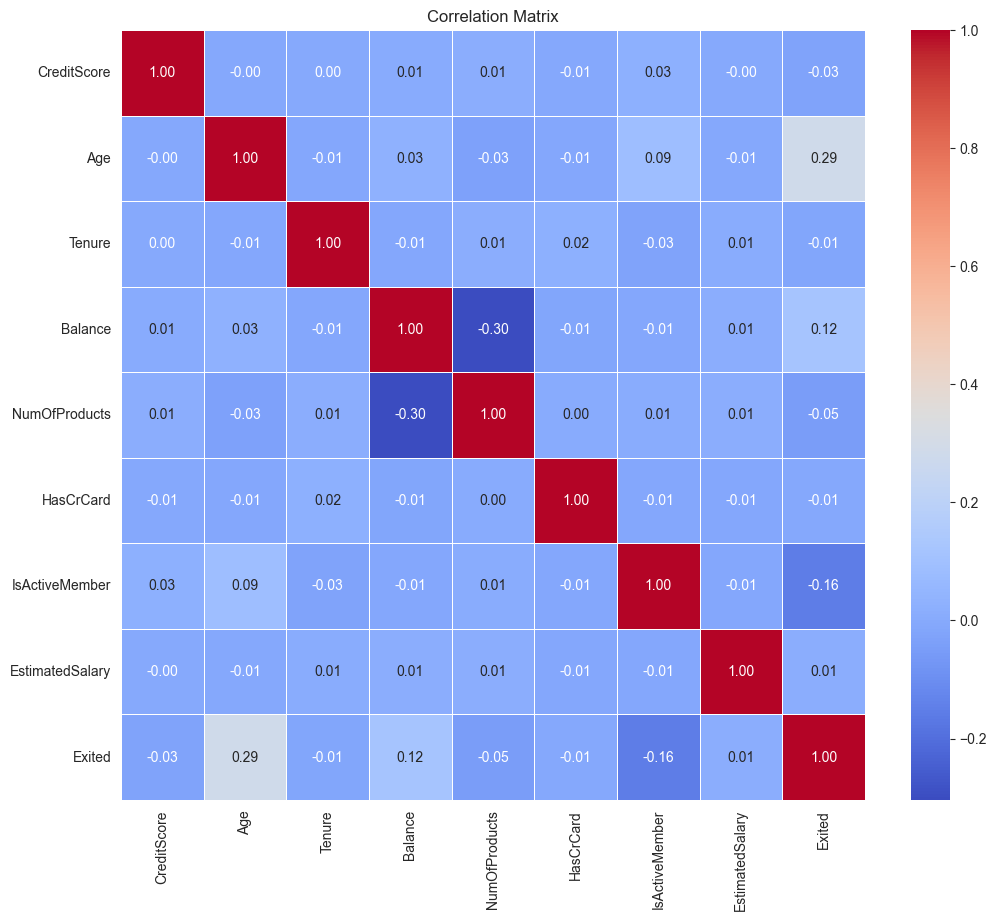

In [28]:
# HEATMAP KORELASI UNTUK FITUR NUMERIK
plt.figure(figsize=(12, 10))
correlation_matrix = data[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Yang paling berpengaruh adalah AGE/USIA, BALANCE, ESTIMATED SALARY

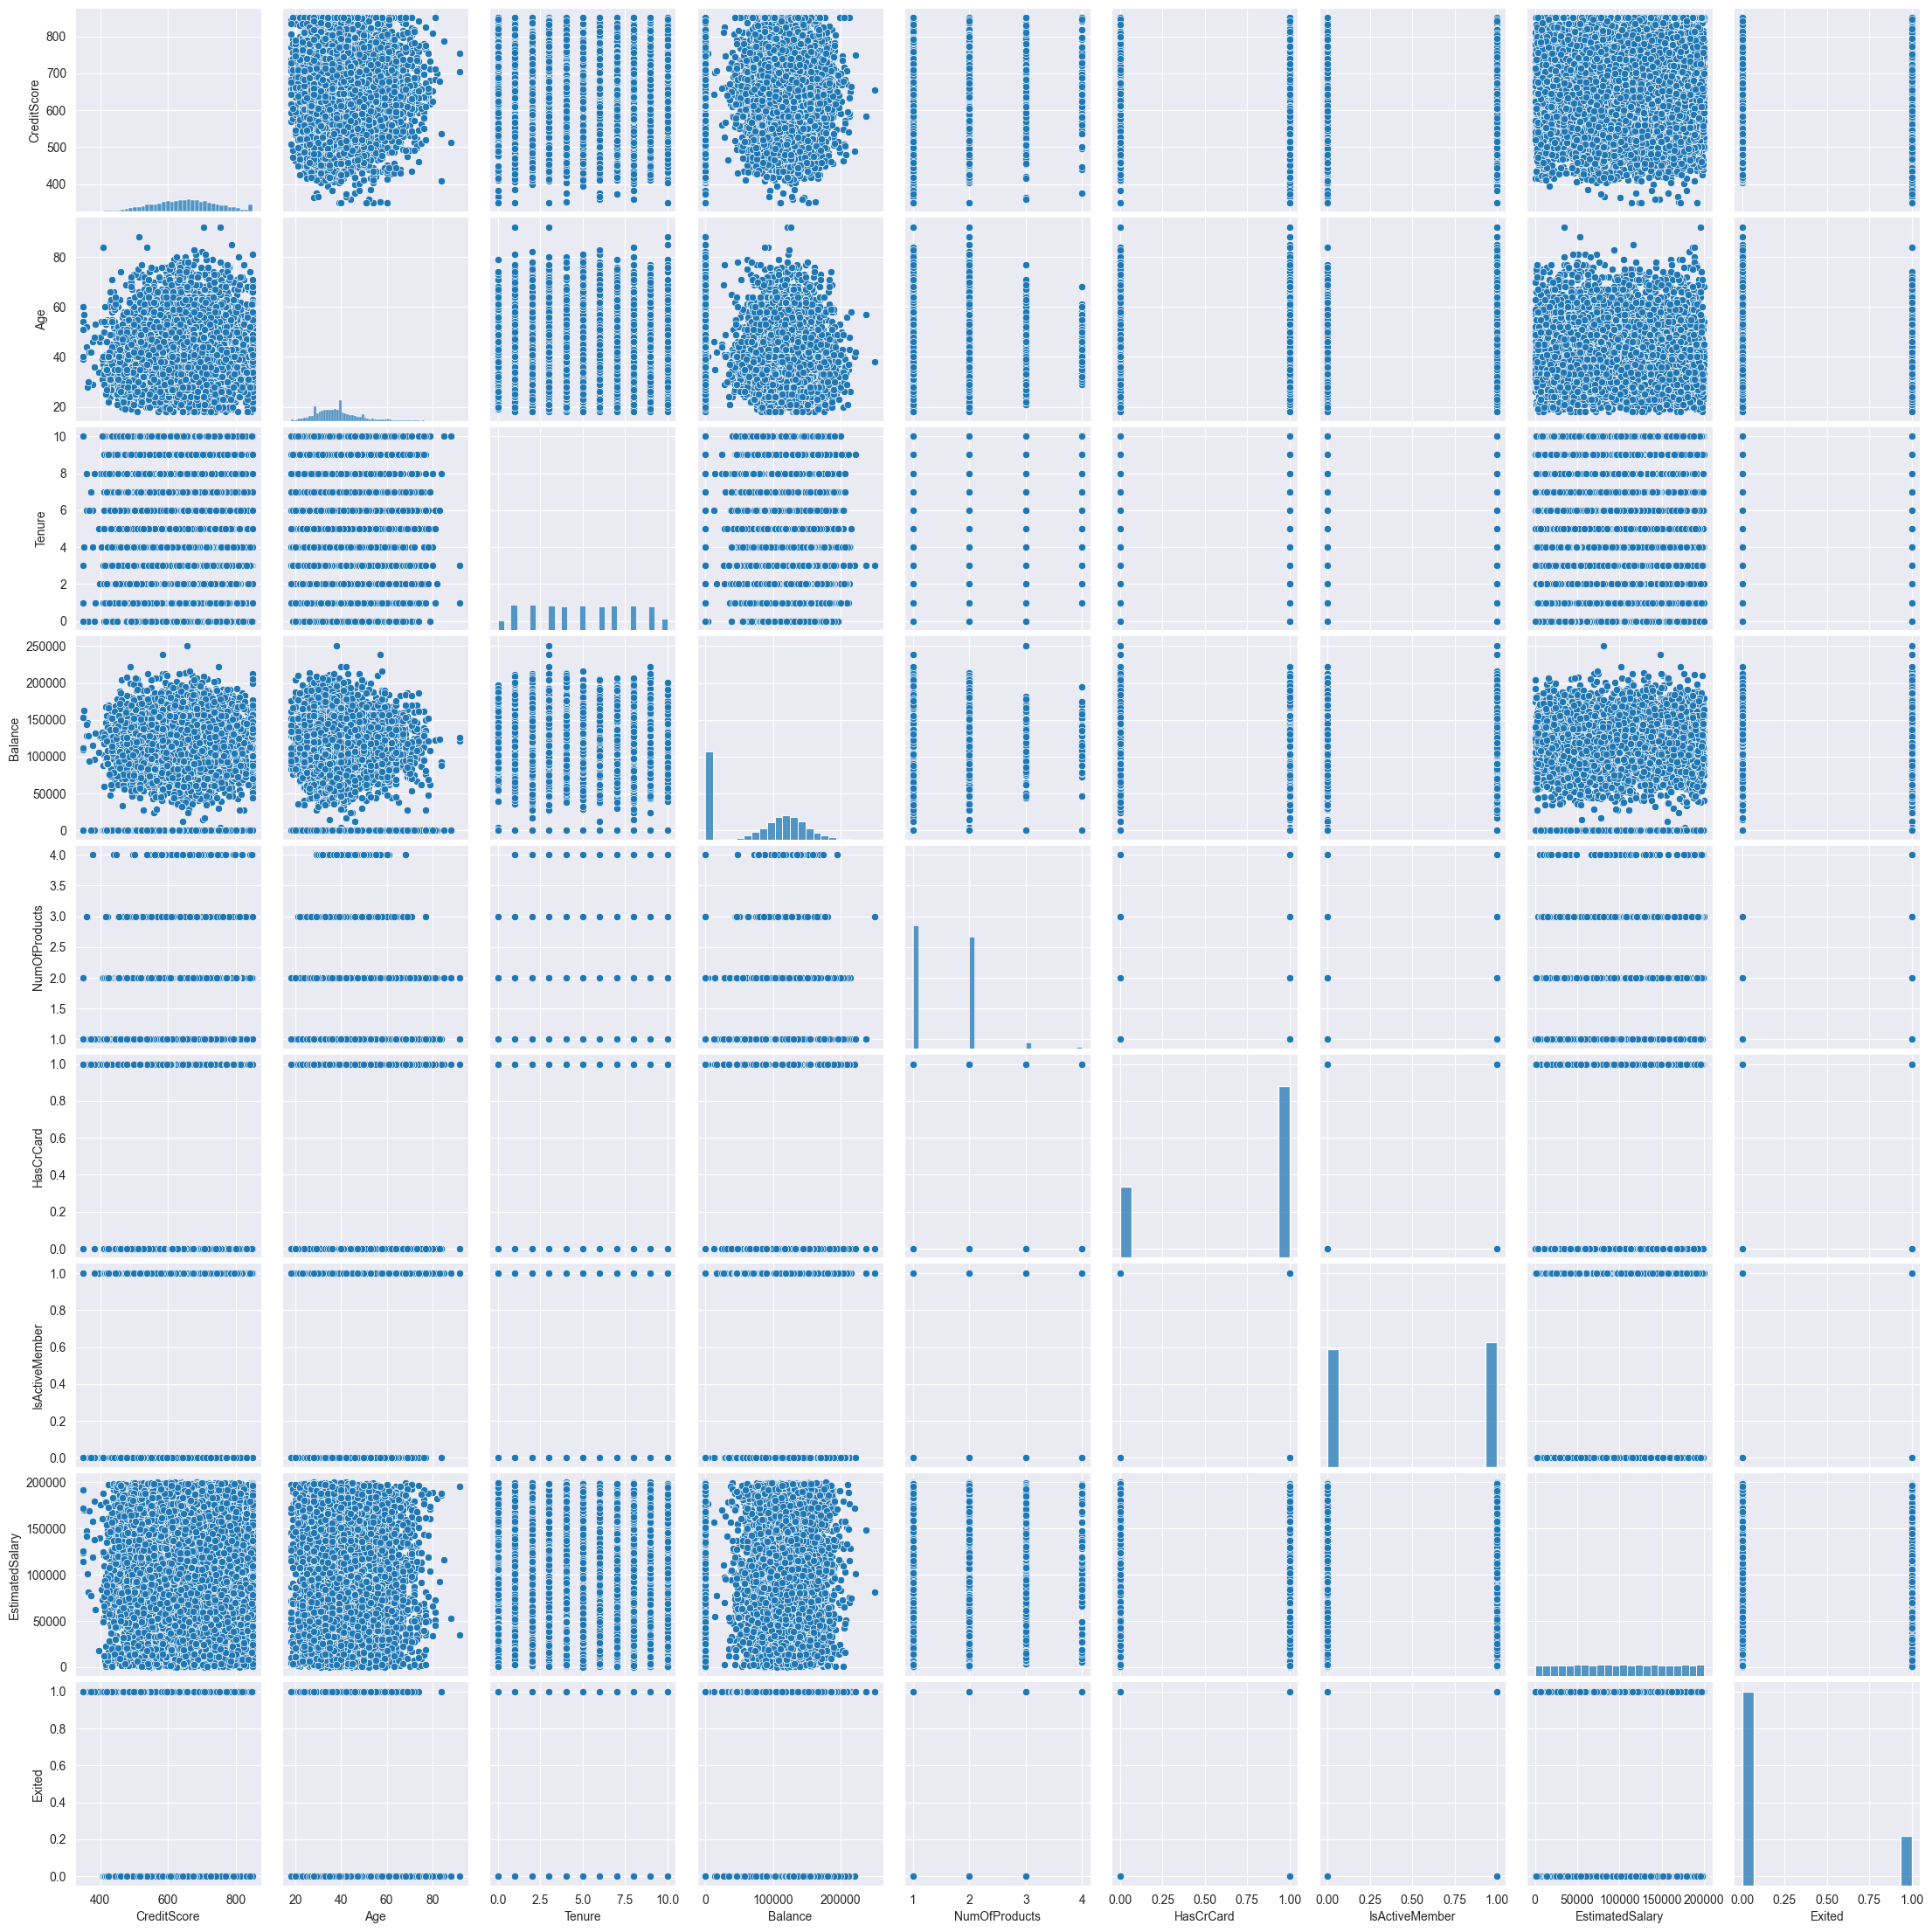

In [29]:
# PAIR PLOT UNTUK VISUALISASIKAN HUBUNGAN ANTAR FITUR
sns.pairplot(data[num_features])
plt.show()

**KITA GUNAKAN COUNTPLOT UNTUK MENGHITUNG JULAH INSTANCE UNTUK MASING2 KELAS DALAM VARIABEL TARGET**

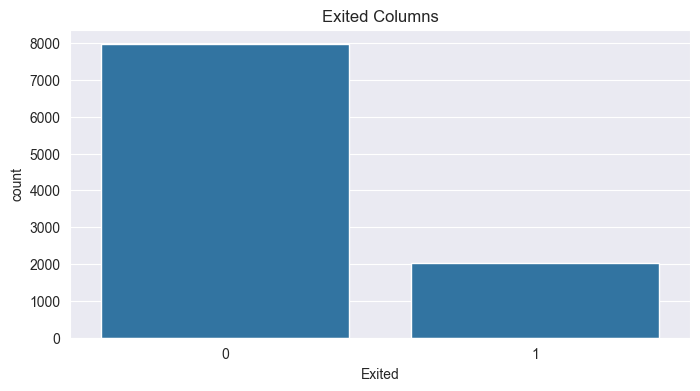

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data)
plt.title("Exited Columns")
plt.show()

Ada ketidakseimbangan antara pelanggan churn dengan pelanggan stuck

In [37]:
data[num_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Label Encoder

In [32]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# Kita akan melakukan encoding pada fitur geography dan gender
label_encoder = LabelEncoder()

cat_encoder = ['Geography', 'Gender']

for col in cat_encoder:
    data[col] = label_encoder.fit_transform(data[col])

# Show
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Data Scalling

In [38]:
scaler = MinMaxScaler()

numeric_features = data.select_dtypes(include='number').columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [39]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


# Data Splitting

In [40]:
# Pisahkan fitur (x) dan (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(8000, 10), y_train=(8000,)
Test data shape: X_test=(2000, 10), y_test=(2000,)


# Model Building


In [42]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

# Model Evaluation

In [49]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    }
    return results

# Mengevaluasi setiap model
results = {
    'KNN': evaluate_model(knn, X_test, y_test),
    'DT': evaluate_model(dt, X_test, y_test),
    'RF': evaluate_model(rf, X_test, y_test),
    'SVM': evaluate_model(svm, X_test, y_test),
    'NB': evaluate_model(nb, X_test, y_test),
}

# Buat DF untuk ringkas hasil
summary_df = pd.DataFrame(columns=['Model', "Accuracy", "Precision", "Recall", "F1-Score"])

# Isi DF dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
    })

# Konversi daftar kamus ke DF
summary_df = pd.DataFrame(rows)

# Tampilkan
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.8240,0.595349,0.325700,0.421053
1,DT,0.7765,0.440000,0.503817,0.469751
2,RF,0.8640,0.753138,0.458015,0.569620
3,SVM,0.8530,0.827815,0.318066,0.459559
4,NB,0.8285,0.681159,0.239186,0.354049


# Evaluasi Confusion Matrix

## KNN

In [44]:
evaluate_model(knn, X_test, y_test)

{'Confusion Matrix': array([[1520,   87],
        [ 265,  128]], dtype=int64),
 'True Positive (TP)': 128,
 'False Positive (FP)': 87,
 'False Negative (FN)': 265,
 'True Negative (TN)': 1520,
 'Accuracy': 0.824,
 'Precision': 0.5953488372093023,
 'Recall': 0.3256997455470738,
 'F1-Score': 0.42105263157894735}

## DT

In [45]:
evaluate_model(dt, X_test, y_test)

{'Confusion Matrix': array([[1355,  252],
        [ 195,  198]], dtype=int64),
 'True Positive (TP)': 198,
 'False Positive (FP)': 252,
 'False Negative (FN)': 195,
 'True Negative (TN)': 1355,
 'Accuracy': 0.7765,
 'Precision': 0.44,
 'Recall': 0.5038167938931297,
 'F1-Score': 0.4697508896797153}

## RF

In [46]:
evaluate_model(rf, X_test, y_test)

{'Confusion Matrix': array([[1548,   59],
        [ 213,  180]], dtype=int64),
 'True Positive (TP)': 180,
 'False Positive (FP)': 59,
 'False Negative (FN)': 213,
 'True Negative (TN)': 1548,
 'Accuracy': 0.864,
 'Precision': 0.7531380753138075,
 'Recall': 0.4580152671755725,
 'F1-Score': 0.569620253164557}

## SVM

In [47]:
evaluate_model(svm, X_test, y_test)

{'Confusion Matrix': array([[1581,   26],
        [ 268,  125]], dtype=int64),
 'True Positive (TP)': 125,
 'False Positive (FP)': 26,
 'False Negative (FN)': 268,
 'True Negative (TN)': 1581,
 'Accuracy': 0.853,
 'Precision': 0.8278145695364238,
 'Recall': 0.31806615776081426,
 'F1-Score': 0.45955882352941174}

## NB

In [48]:
evaluate_model(nb, X_test, y_test)

{'Confusion Matrix': array([[1563,   44],
        [ 299,   94]], dtype=int64),
 'True Positive (TP)': 94,
 'False Positive (FP)': 44,
 'False Negative (FN)': 299,
 'True Negative (TN)': 1563,
 'Accuracy': 0.8285,
 'Precision': 0.6811594202898551,
 'Recall': 0.23918575063613232,
 'F1-Score': 0.3540489642184557}

MODEL TERPILIH ADALAH RANDOM FOREST

# MODEL SAVING

In [50]:
import joblib

# Menyimpan model Random Forest ke dalam file joblib
joblib.dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [51]:
import pickle

# Menyimpan model rf ke dalam file pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)